In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


In [6]:
glass = pd.read_csv("glass.data")
glass.columns = ['id number','RI(refractive index)', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe','Type of glass']
glass.head()

,id number,RI(refractive index),Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [7]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id number             213 non-null    int64  
 1   RI(refractive index)  213 non-null    float64
 2   Na                    213 non-null    float64
 3   Mg                    213 non-null    float64
 4   Al                    213 non-null    float64
 5   Si                    213 non-null    float64
 6   K                     213 non-null    float64
 7   Ca                    213 non-null    float64
 8   Ba                    213 non-null    float64
 9   Fe                    213 non-null    float64
 10  Type of glass         213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


In [4]:
glass.isnull().sum()

1          0
1.52101    0
13.64      0
4.49       0
1.10       0
71.78      0
0.06       0
8.75       0
0.00       0
0.00.1     0
1.1        0
dtype: int64

In [8]:
glass.describe()

,id number,RI(refractive index),Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [10]:
glass['Type of glass'].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

In [11]:
glass.columns = ['id number','RI(refractive index)', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe','Type of glass']

<!-- Glass Type (1:   building_windows_float_processed,  -->
<!-- 2: building_windows_non_float_processed,  -->
<!-- 3:   vehicle_windows_float_processed,  -->
<!-- 4: vehicle_windows_non_float_processed,  -->
<!-- 5:   containers, 6: tableware, 7: headlamps) -->

In [12]:
glass.columns

Index(['id number', 'RI(refractive index)', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca',
       'Ba', 'Fe', 'Type of glass'],
      dtype='object')

# Glass Type 
(1:   building_windows_float_processed, 
 2: building_windows_non_float_processed, 
 3:   vehicle_windows_float_processed, 
 4: vehicle_windows_non_float_processed, 
 5:   containers, 
 6: tableware, 
 7: headlamps)

In [13]:
glass.tail()

,id number,RI(refractive index),Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
208,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
209,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
210,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
211,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
212,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


# Data Visualization

<AxesSubplot:xlabel='Type of glass', ylabel='count'>

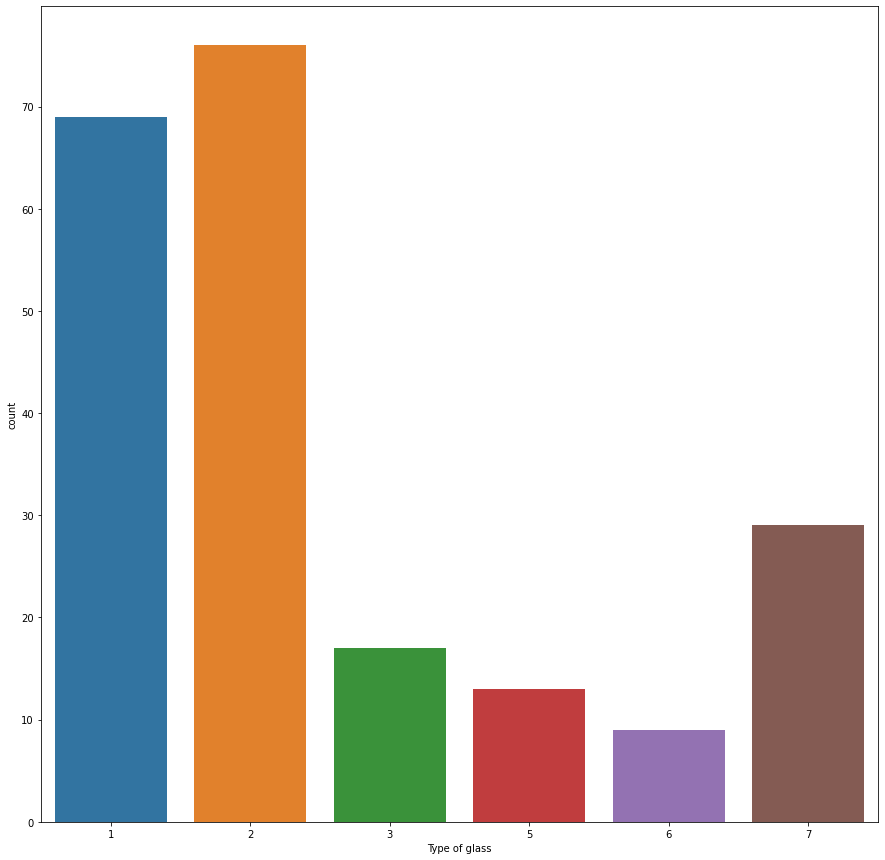

In [14]:
plt.figure(figsize=(15,15))
sns.countplot(x='Type of glass', data=glass)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Na', ylabel='Density'>

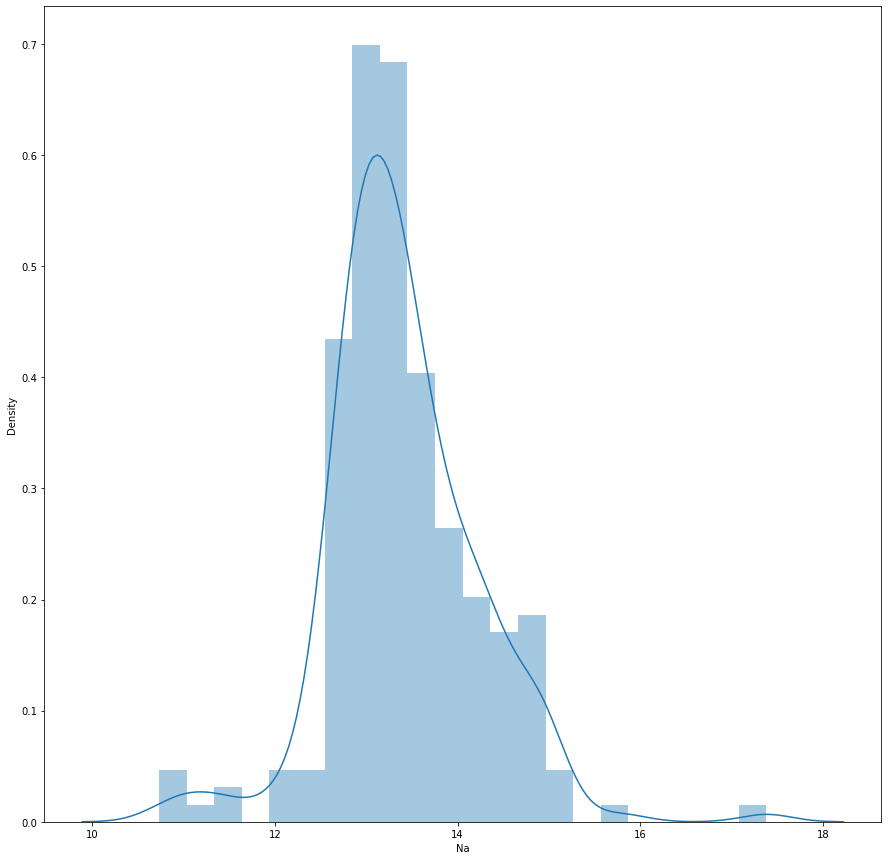

In [15]:
plt.figure(figsize=(15,15))
sns.distplot(glass['Na'])

<Figure size 1080x1080 with 0 Axes>

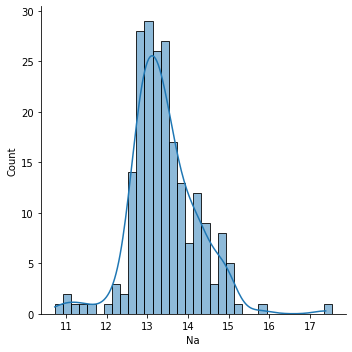

In [16]:
plt.figure(figsize=(15,15))
sns.displot(x='Na', data=glass, kde=True, binwidth=0.2)

<AxesSubplot:xlabel='Si', ylabel='Count'>

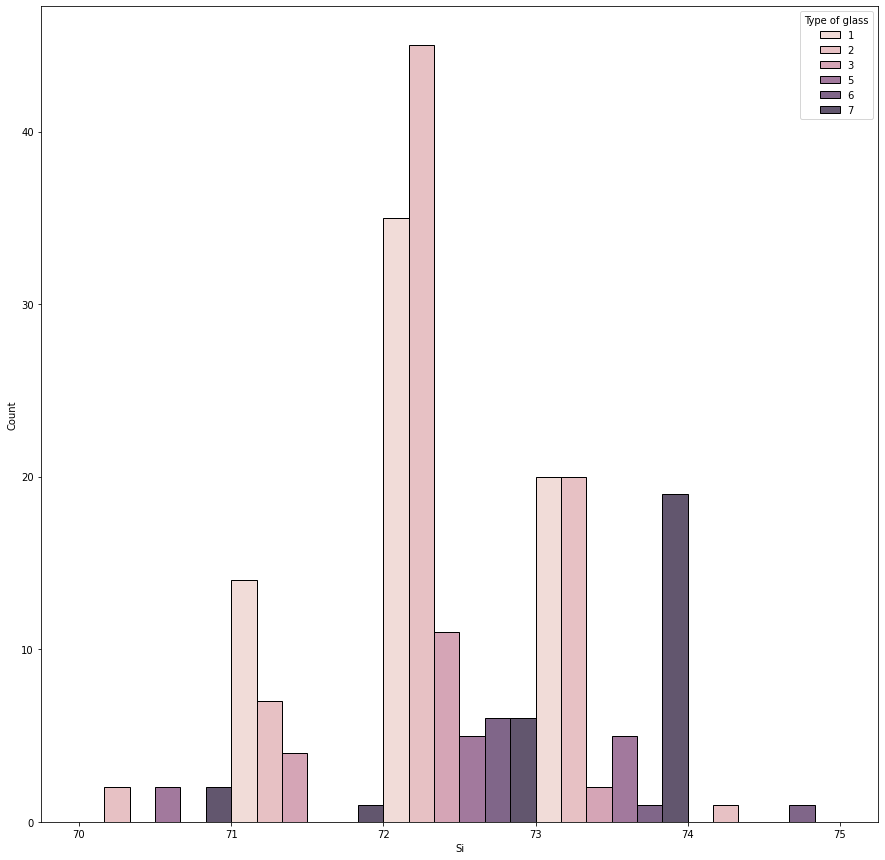

In [17]:
plt.figure(figsize=(15,15))
sns.histplot(x='Si', data=glass, hue='Type of glass', multiple='dodge', bins=[70,71,72,73,74,75])

<Figure size 1080x1080 with 0 Axes>

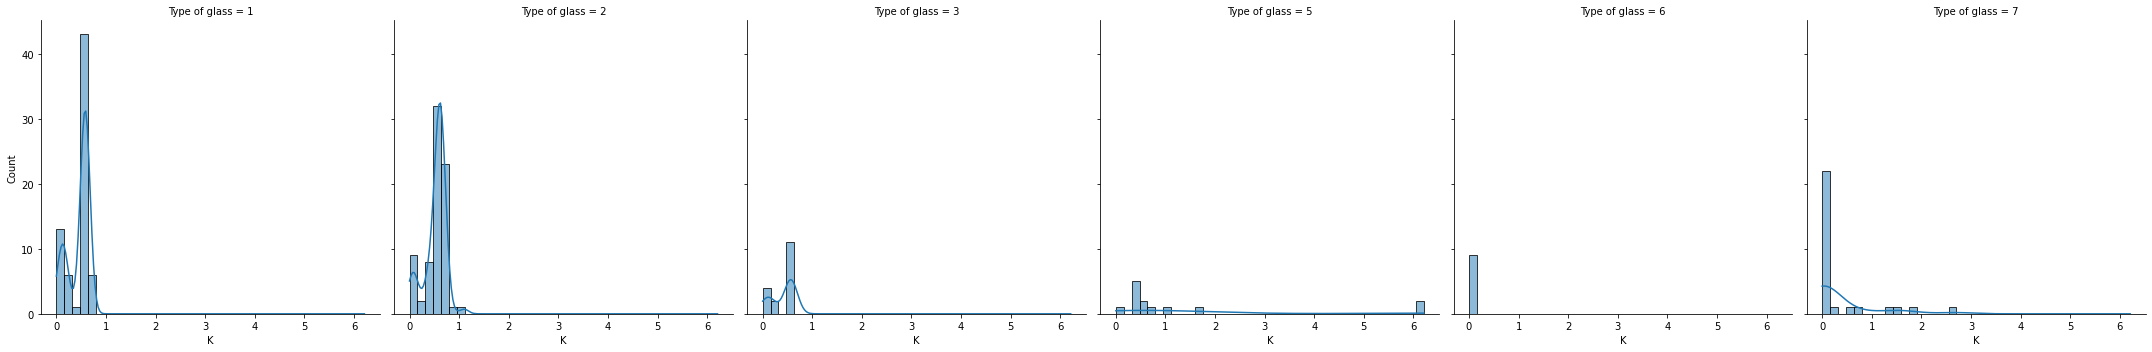

In [18]:
plt.figure(figsize=(15,15))
sns.displot(x='K', data=glass, kde=True, col='Type of glass')

<AxesSubplot:xlabel='Mg', ylabel='Count'>

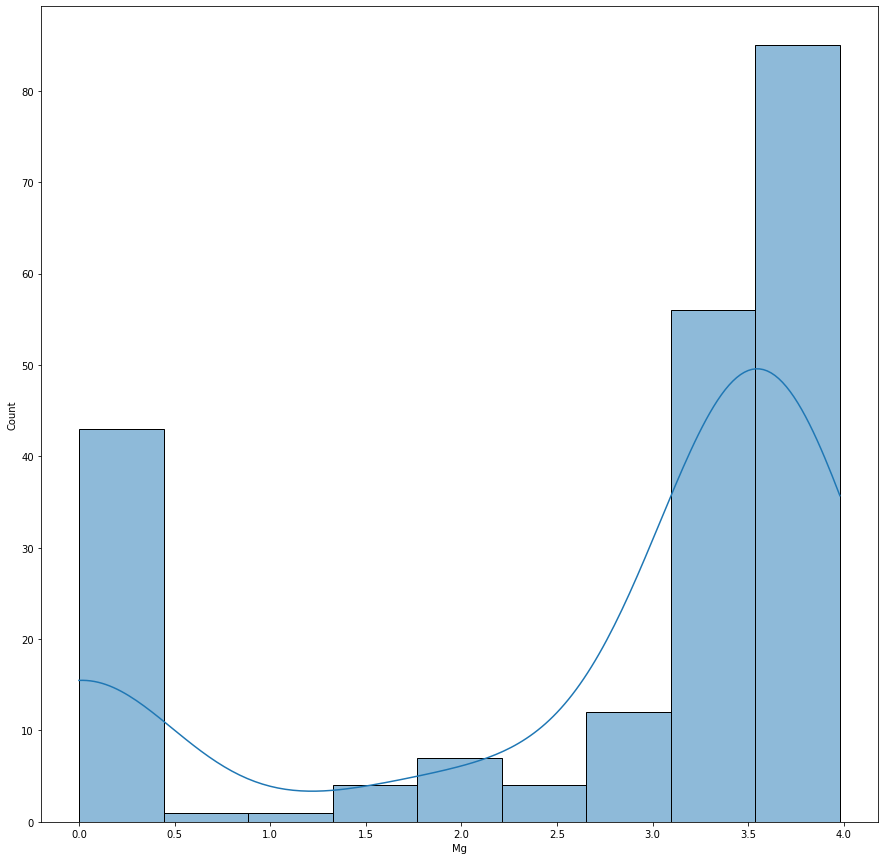

In [19]:
plt.figure(figsize=(15,15))
sns.histplot(x='Mg', data=glass, kde=True)

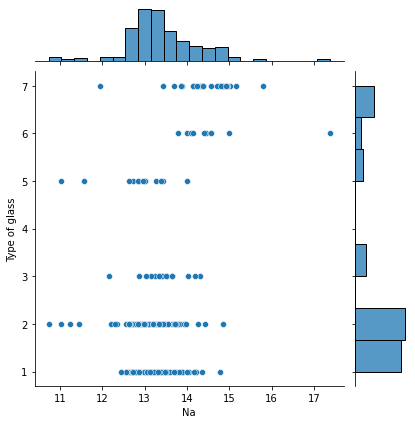

In [20]:
sns.jointplot(x='Na', y='Type of glass', data=glass)

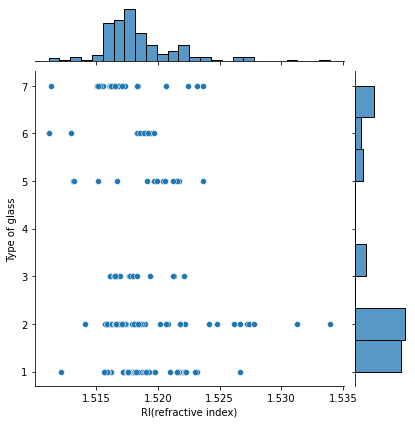

In [21]:
sns.jointplot(x='RI(refractive index)', y='Type of glass', data=glass)

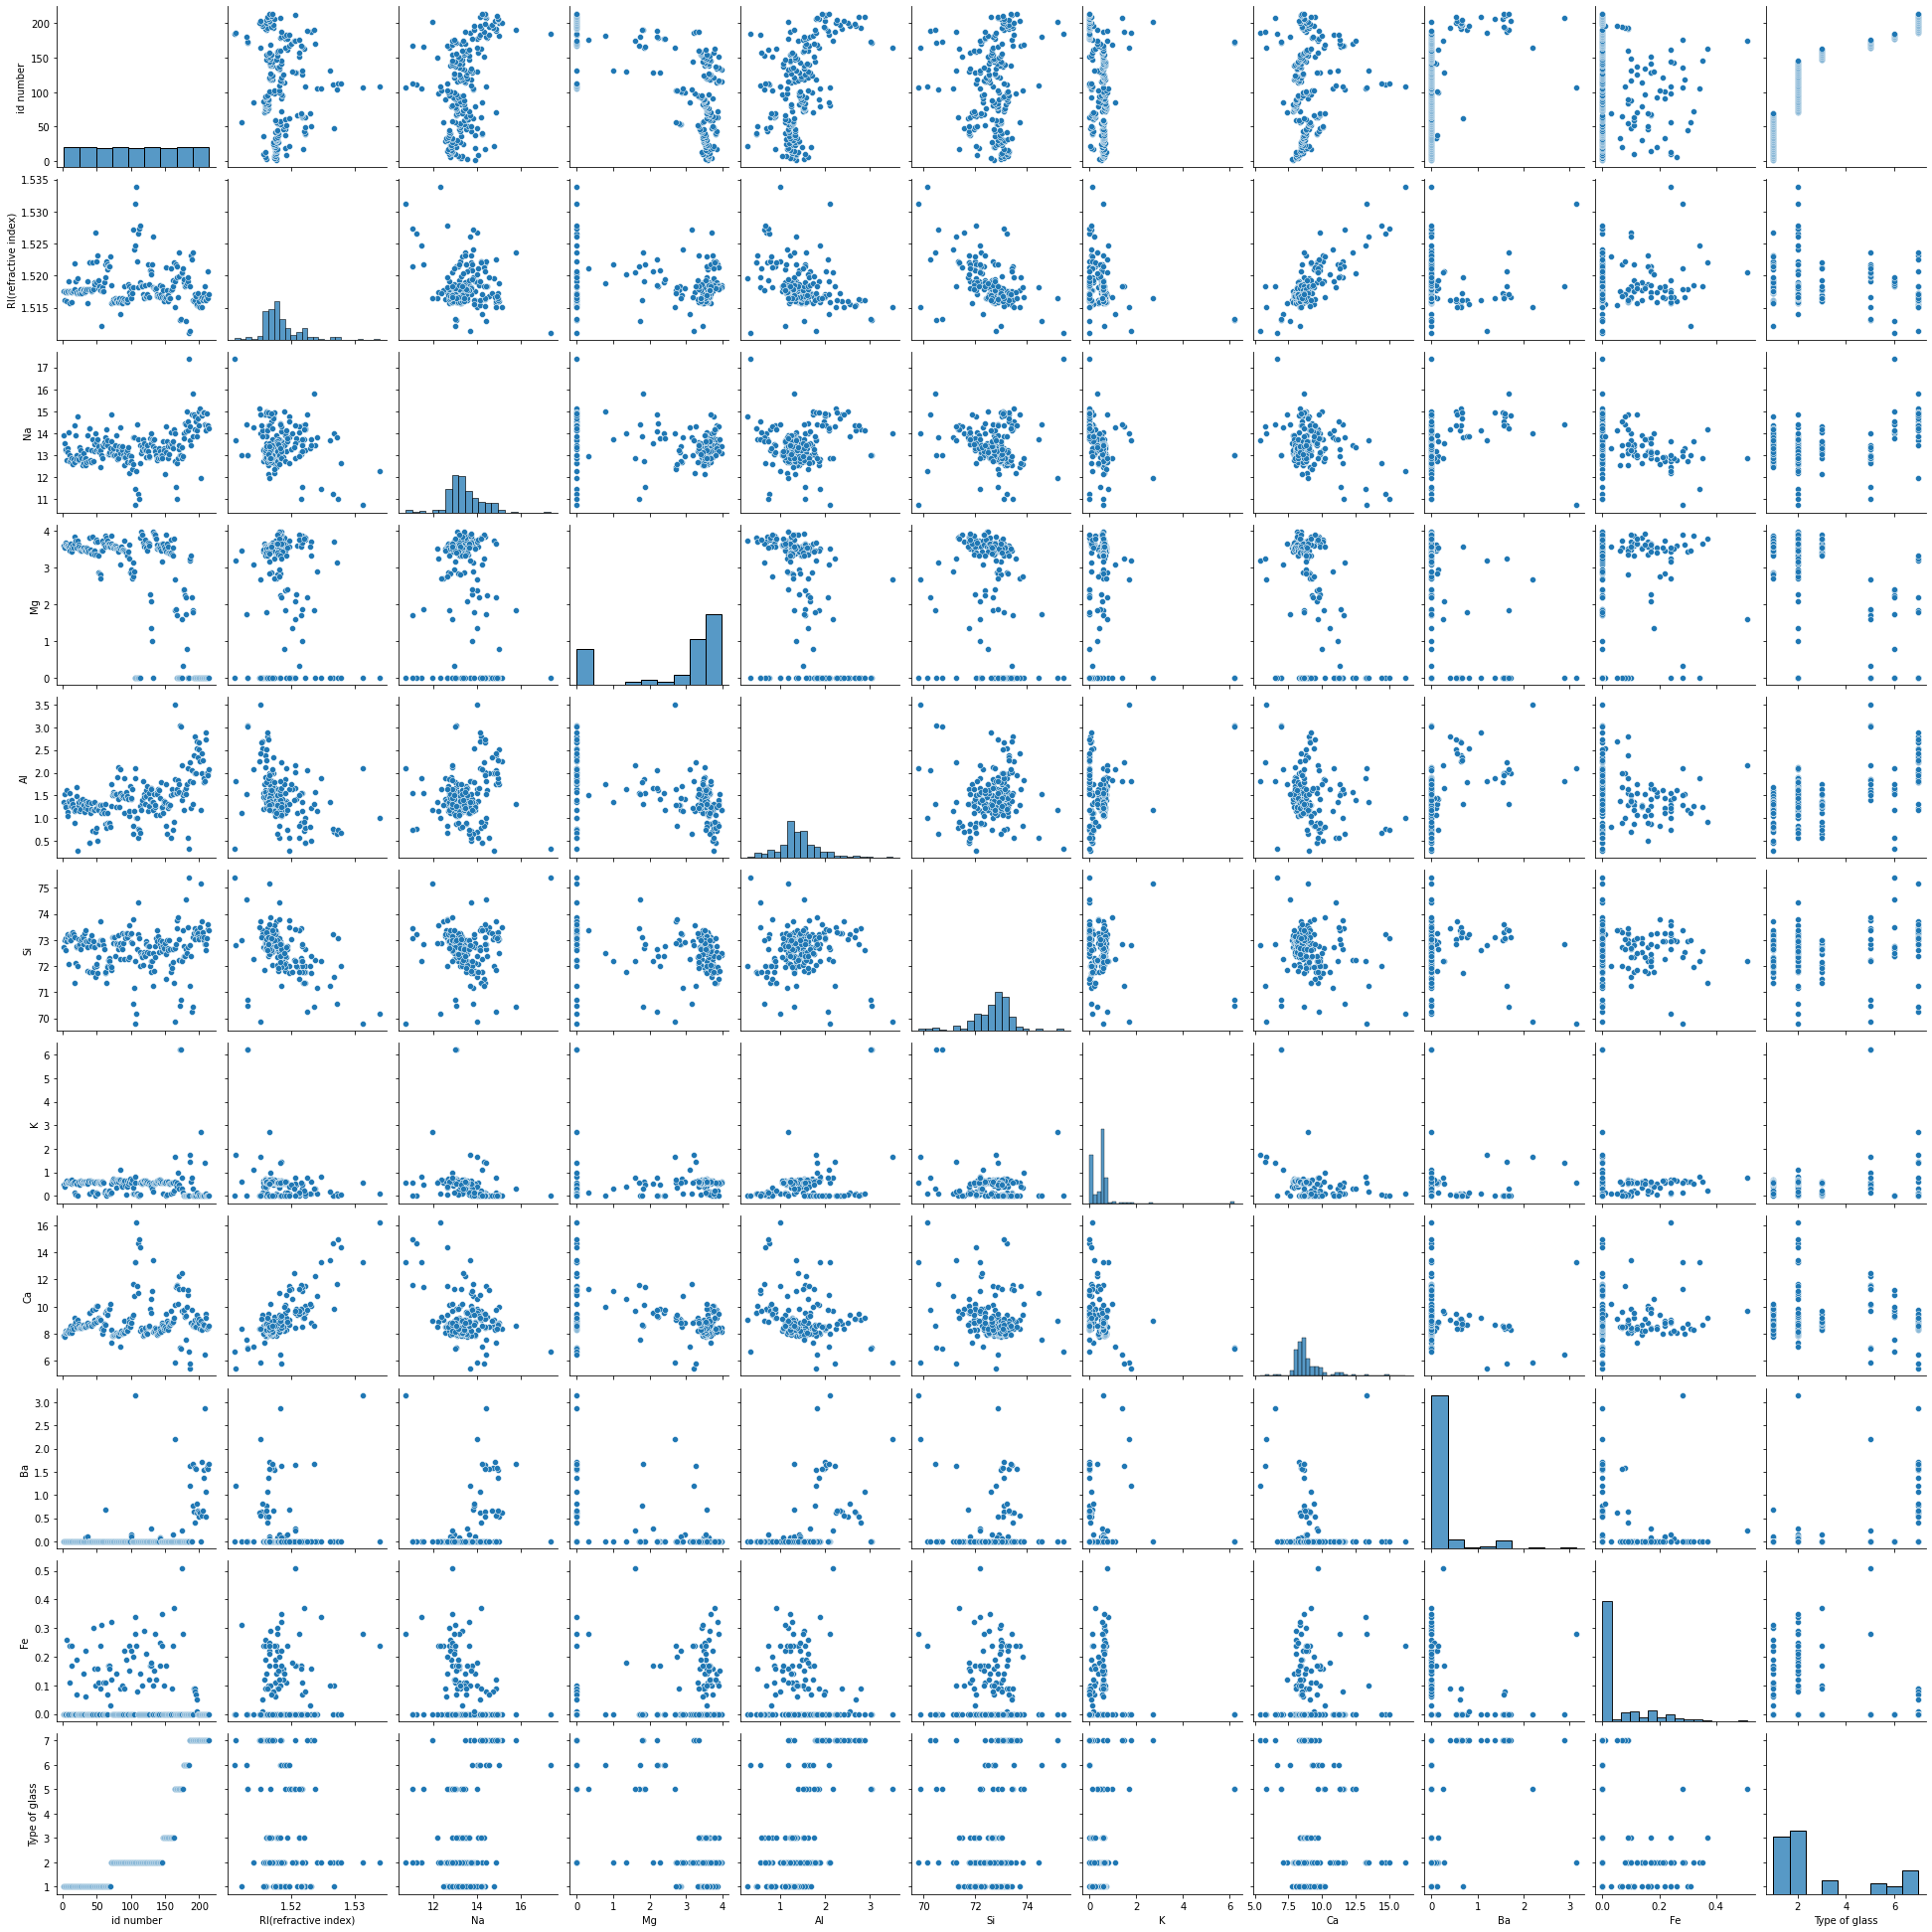

In [22]:
sns.pairplot(glass)

<AxesSubplot:>

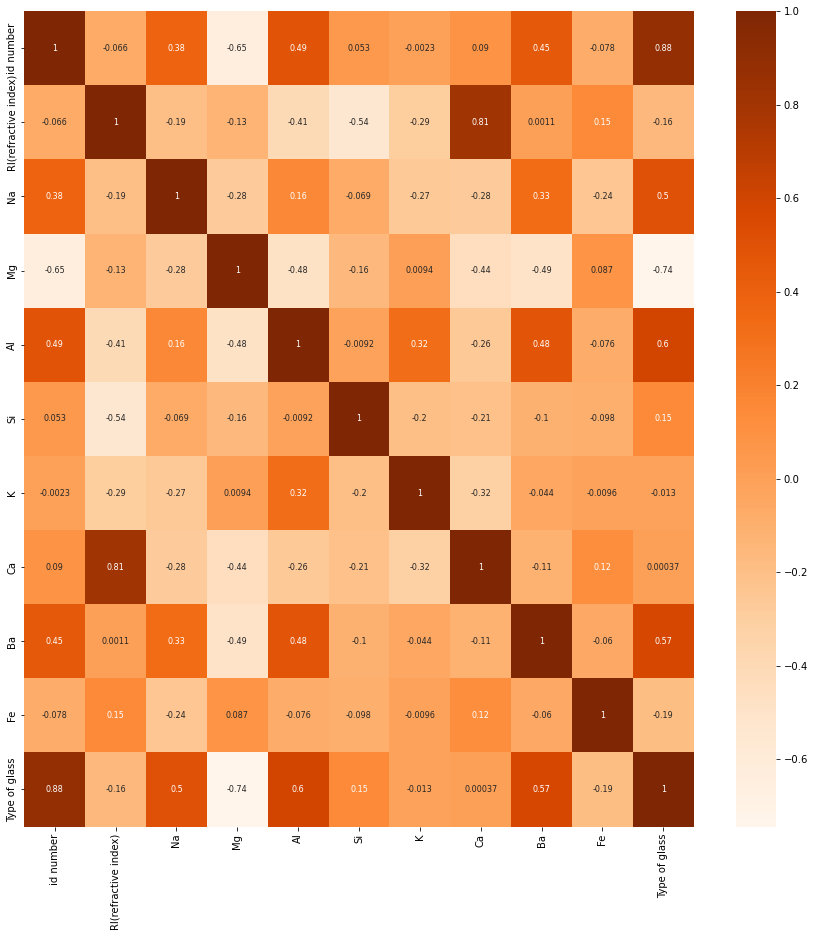

In [23]:
plt.figure(figsize=(15,15))
correlation = glass.corr()
sns.heatmap(correlation, cmap='Oranges', cbar=True, annot_kws={'size':8}, annot=True)

In [26]:
x = glass.drop(['id number', 'Type of glass'], axis=1)
y = glass['Type of glass']

In [27]:
# splitting the data into test and train datasets
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state= 0, test_size=0.1)

In [28]:
# Training the model
tree = DecisionTreeClassifier(max_depth=4)

In [29]:
svc = LinearSVC()

In [30]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [31]:
svc.fit(x_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [32]:
# Model Evaluation SVM
prediction = svc.predict(x_train)
score = metrics.accuracy_score(prediction, y_train)
print(f"Training accuracy_score : {score}")

Training accuracy_score : 0.17801047120418848


In [33]:
prediction2 = svc.predict(x_test)
score = metrics.accuracy_score(prediction2, y_test)
print(f"Test accuracy_score : {score}")

Test accuracy_score : 0.3181818181818182


In [34]:
# Model Evaluation decisionTreeclassifier
prediction = tree.predict(x_train)
score = metrics.accuracy_score(prediction, y_train)
print(f"Training accuracy_score : {score}")

Training accuracy_score : 0.8010471204188482


In [35]:
prediction2 = tree.predict(x_test)
score = metrics.accuracy_score(prediction2, y_test)
print(f"Test accuracy_score : {score}")

Test accuracy_score : 0.5454545454545454


In [36]:
# DecisionTreeClassifier is overfitting 
# LinearSVC is underfitting

In [101]:
tree_2 = DecisionTreeClassifier(max_depth=20)

In [71]:
svc_2 = LinearSVC(C=150)

In [102]:
tree_2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=20)

In [72]:
svc_2.fit(x_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=150)

In [73]:
# Model Evaluation SVM
prediction = svc_2.predict(x_train)
score = metrics.accuracy_score(prediction, y_train)
print(f"Training accuracy_score : {score}")

Training accuracy_score : 0.47643979057591623


In [74]:
prediction2 = svc_2.predict(x_test)
score = metrics.accuracy_score(prediction2, y_test)
print(f"Test accuracy_score : {score}")

Test accuracy_score : 0.5454545454545454


In [103]:
# Model Evaluation decisionTreeclassifier
prediction = tree_2.predict(x_train)
score = metrics.accuracy_score(prediction, y_train)
print(f"Training accuracy_score : {score}")

Training accuracy_score : 1.0


In [104]:
prediction2 = tree_2.predict(x_test)
score = metrics.accuracy_score(prediction2, y_test)
print(f"Test accuracy_score : {score}")

Test accuracy_score : 0.7272727272727273
